# Here we will go through the data we collected from instagram posts:

- Problem definition - Post success recognition
- Preliminary preparations for the solution - Done
- Intention to the solution - EDA
- Assimilation in the field

Let's do here the import:

In [136]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re # Regular expression 
from langdetect import detect #Language detection

Loading file:

In [48]:
df = pd.read_csv("total_data.csv")

Dataframe description:

In [49]:
df.describe(include='all')

,id,likes,following,followers,posts_amount,celeb,pic_vid,hashtag,hashtag_amount,pCo,content,post_date,curr_date,predict
count,7342,6.863000e+03,6980.000000,6.980000e+03,6980.000000,7342.000000,7342.000000,5963,7342.000000,6924,7326,7340,7342,6523.000000
unique,6654,NaN,NaN,NaN,NaN,NaN,NaN,5270,NaN,5597,6225,166,15,NaN
top,Cd3IHD_KmBW,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,text,,1h,06/06/2022,NaN
freq,9,NaN,NaN,NaN,NaN,NaN,NaN,119,NaN,103,459,815,1141,NaN
mean,NaN,1.081872e+04,1171.248281,8.590198e+04,1319.232235,0.032280,0.164941,NaN,16.219423,NaN,NaN,NaN,NaN,0.132608
std,NaN,2.969207e+05,1616.284394,3.351094e+05,2701.106340,0.176755,0.371153,NaN,11.517614,NaN,NaN,NaN,NaN,0.339176
min,NaN,2.000000e+00,0.000000,1.000000e+00,1.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,NaN,2.165000e+02,195.000000,4.268000e+03,188.000000,0.000000,0.000000,NaN,4.000000,NaN,NaN,NaN,NaN,0.000000
50%,NaN,6.040000e+02,609.000000,1.480000e+04,504.500000,0.000000,0.000000,NaN,18.000000,NaN,NaN,NaN,NaN,0.000000
75%,NaN,2.187000e+03,1315.000000,5.570000e+04,1340.000000,0.000000,0.000000,NaN,27.000000,NaN,NaN,NaN,NaN,0.000000


In [50]:
df.head()

,id,likes,following,followers,posts_amount,celeb,pic_vid,hashtag,hashtag_amount,pCo,content,post_date,curr_date,predict
0,CeRUvKzq3n4,407.0,867.0,32400.0,792.0,0,1,diormakeup diorbeautylovers,2,person text hairpiece human face clothing scre...,אם את טסה בקרוב או שסתם באלך להתפנק במותג מהמם...,4d,05/06/2022,0.0
1,Cd4EPrQqumz,697.0,450.0,40600.0,125.0,0,0,NaN,0,NaN,أذكر تلك المقولة الس اخرة ثمة نوعان من الأغبيا...,1w,05/06/2022,0.0
2,CeT8winMlKi,928.0,234.0,5910.0,105.0,0,0,NaN,0,outdoor person sky clothing girl summer furnit...,תודה רבה על כל הברכות והאיחולים חיממתם לי ת לב,3d,05/06/2022,0.0
3,CeGNHlljW1M,22607.0,6.0,166000.0,2124.0,0,0,NaN,0,clothing human face person tie smile,تابعوا قناتنا تليجرام موجودة بالبايو من اجمل ا...,1w,05/06/2022,0.0
4,CeRBpNosRXh,1239.0,676.0,6542.0,40.0,0,0,foryou muscle musica fortnite 🌴 motivation for...,6,NaN,page,4d,05/06/2022,0.0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7342 entries, 0 to 7341
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              7342 non-null   object 
 1   likes           6863 non-null   float64
 2   following       6980 non-null   float64
 3   followers       6980 non-null   float64
 4   posts_amount    6980 non-null   float64
 5   celeb           7342 non-null   int64  
 6   pic_vid         7342 non-null   int64  
 7   hashtag         5963 non-null   object 
 8   hashtag_amount  7342 non-null   int64  
 9   pCo             6924 non-null   object 
 10  content         7326 non-null   object 
 11  post_date       7340 non-null   object 
 12  curr_date       7342 non-null   object 
 13  predict         6523 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 803.2+ KB


array([[<AxesSubplot:title={'center':'likes'}>,
        <AxesSubplot:title={'center':'following'}>,
        <AxesSubplot:title={'center':'followers'}>],
       [<AxesSubplot:title={'center':'posts_amount'}>,
        <AxesSubplot:title={'center':'celeb'}>,
        <AxesSubplot:title={'center':'pic_vid'}>],
       [<AxesSubplot:title={'center':'hashtag_amount'}>,
        <AxesSubplot:title={'center':'predict'}>, <AxesSubplot:>]],
      dtype=object)

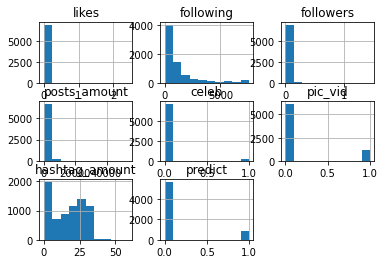

In [52]:
df.hist()

<AxesSubplot:>

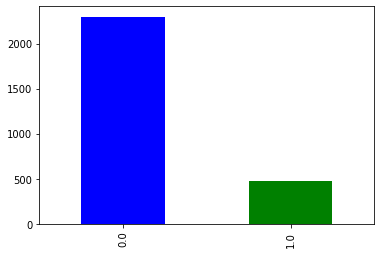

In [117]:
df['predict'].value_counts().plot(kind='bar', color=['blue', 'green'])

<AxesSubplot:ylabel='predict'>

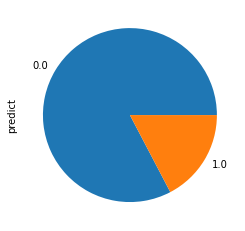

In [113]:
df['predict'].value_counts().plot(kind='pie')

In [53]:
df.shape

(7342, 14)

In [54]:
df.corr()

,likes,following,followers,posts_amount,celeb,pic_vid,hashtag_amount,predict
likes,1.000000,0.001672,0.526538,0.008988,0.069112,0.021585,-0.019700,0.070163
following,0.001672,1.000000,-0.063522,0.069225,-0.024452,-0.082334,0.075980,-0.066072
followers,0.526538,-0.063522,1.000000,0.319790,0.287803,0.092441,-0.084035,-0.054100
posts_amount,0.008988,0.069225,0.319790,1.000000,0.168610,0.028316,-0.023277,-0.118411
celeb,0.069112,-0.024452,0.287803,0.168610,1.000000,-0.002266,-0.175045,-0.024641
pic_vid,0.021585,-0.082334,0.092441,0.028316,-0.002266,1.000000,0.021041,0.171019
hashtag_amount,-0.019700,0.075980,-0.084035,-0.023277,-0.175045,0.021041,1.000000,-0.065574
predict,0.070163,-0.066072,-0.054100,-0.118411,-0.024641,0.171019,-0.065574,1.000000


array([[<AxesSubplot:xlabel='likes', ylabel='likes'>,
        <AxesSubplot:xlabel='following', ylabel='likes'>,
        <AxesSubplot:xlabel='followers', ylabel='likes'>,
        <AxesSubplot:xlabel='posts_amount', ylabel='likes'>,
        <AxesSubplot:xlabel='celeb', ylabel='likes'>,
        <AxesSubplot:xlabel='pic_vid', ylabel='likes'>,
        <AxesSubplot:xlabel='hashtag_amount', ylabel='likes'>,
        <AxesSubplot:xlabel='predict', ylabel='likes'>],
       [<AxesSubplot:xlabel='likes', ylabel='following'>,
        <AxesSubplot:xlabel='following', ylabel='following'>,
        <AxesSubplot:xlabel='followers', ylabel='following'>,
        <AxesSubplot:xlabel='posts_amount', ylabel='following'>,
        <AxesSubplot:xlabel='celeb', ylabel='following'>,
        <AxesSubplot:xlabel='pic_vid', ylabel='following'>,
        <AxesSubplot:xlabel='hashtag_amount', ylabel='following'>,
        <AxesSubplot:xlabel='predict', ylabel='following'>],
       [<AxesSubplot:xlabel='likes', ylabel='f

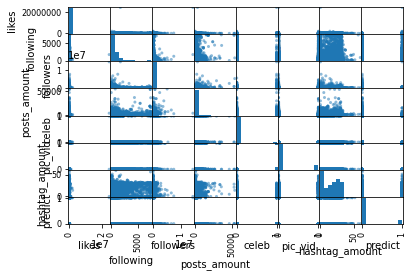

In [55]:
pd.plotting.scatter_matrix(df)

Dropping duplicates posts by ID:

In [56]:
df.drop_duplicates("id",keep='last', inplace=True)

In [57]:
df.shape

(6654, 14)

Dropping rows with NaN values:

In [58]:
df.dropna(inplace=True)

In [59]:
df.shape

(4674, 14)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4674 entries, 0 to 7341
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4674 non-null   object 
 1   likes           4674 non-null   float64
 2   following       4674 non-null   float64
 3   followers       4674 non-null   float64
 4   posts_amount    4674 non-null   float64
 5   celeb           4674 non-null   int64  
 6   pic_vid         4674 non-null   int64  
 7   hashtag         4674 non-null   object 
 8   hashtag_amount  4674 non-null   int64  
 9   pCo             4674 non-null   object 
 10  content         4674 non-null   object 
 11  post_date       4674 non-null   object 
 12  curr_date       4674 non-null   object 
 13  predict         4674 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 547.7+ KB


In [61]:
df['predict'].value_counts()

0.0    4177
1.0     497
Name: predict, dtype: int64

In [62]:
df['content'].unique()

array(['אם את טסה בקרוב או שסתם באלך להתפנק במותג מהמם הנה כמה מוצרים שממש אהבתי lovers',
       'הלםיהודה יצחקוב ואלמוג חדד שהכירו בבית האח הגדול והפכו לזוג נפרדומדובר בלא פחות מהפתעה אחרי שרק לאחרונה הם חסרו מחופשה ממיאמימה אתם חושבים עוד נראה קאמבק או אין סיכויחשיפה של ערן סויסה ',
       'Comment Your Favorite Heart Emoji Letter by letter Follow Link in bio for OrderCredit Dm for Credit forever edit edits edit ',
       ...,
       'Freeway light trails in Perth life isok _shots _wa _shotz vibes ',
       'Quiz is this a night elf or Void elf Art by Astri Lohn Visit the link in my Bio for Warcraft shirts tags art art addict classic cosplay cosplay ',
       '515 West 22nd Street in LANTERN HOUSE By b koncepts b travel Comments and support by sharing are always welcome gram photography destinations exodus new york '],
      dtype=object)

As we can see, we have a lot more unsuccessful posts then successful.

so we will change the paramater of the prediction to be more related to the time of the post.

we will run the code on each row and take the date to check how much times have passed from the publication to the crawling (w-weeks, d-days, h-hours, m-minutes).

+ for w we will check for 0.3 likes/followers ratio
+ for d we will check for 0.25 likes/followers ratio
+ for h we will check for 0.2 likes/followers ratio
+ for m we will check for 0.15 likes/followers ratio

In [63]:
for index,row in df.iterrows():
        if 'd' in row['content']:
            if row['likes']/row['followers'] > 0.20:
                df.at[index,'predict'] = 1

        elif 'h' in row['content']:
            if row['likes']/row['followers'] > 0.15:
                df.at[index,'predict'] = 1

        elif 'm' in row['content']:
            if row['likes']/row['followers'] > 0.10:
                df.at[index,'predict'] = 1


In [64]:
df['predict'].value_counts()

0.0    3908
1.0     766
Name: predict, dtype: int64

As we can see above, we have got a better distribution of predics and more accurate for the long time.

We want to make all our data to be in the same language, so everything that is not english we be dropped:

In [65]:
# check if text is in english if not, drop row
for index,row in df.iterrows():
        try:
                if detect(row['content']) == 'en':
                        None
                else:
                        df.drop(index, inplace=True) 
        except:
                None

In [66]:
df.shape

(2778, 14)

In [67]:
df.head()

,id,likes,following,followers,posts_amount,celeb,pic_vid,hashtag,hashtag_amount,pCo,content,post_date,curr_date,predict
13,CeGcpDcNfCk,27418.0,70.0,53000.0,789.0,0,0,iansomerhalder damonsalvatore tvd thevampiredi...,30,person bride kiss wedding dress love female pe...,Comment Your Favorite Heart Emoji Letter by le...,1w,05/06/2022,1.0
19,Ceb37QdvpTh,252.0,1018.0,263000.0,11950.0,0,0,BlackBrides BlackWoman BlackQueens Melanina Bl...,22,text bride person wedding dress clothing femal...,,39m,05/06/2022,0.0
22,Ceb5Q_OMFEp,144.0,569.0,23100.0,672.0,0,0,sunset sunrise sunsets sunsetlovers sunsetpics...,30,animal aquatic bird bird outdoor sea gull wate...,s lovers pics _vision photography porn lover ...,30m,05/06/2022,0.0
28,Ceb5bAghP8k,310.0,496.0,33100.0,269.0,0,0,love lifequotes live fashion travel style blog...,13,person fashion accessory clothing handbag woma...,Enjoy life there s plenty of time to be dead,36m,05/06/2022,0.0
30,Ceb3FyBoWkx,180.0,1608.0,5798.0,561.0,0,0,mirror_of_our_souls moody_captures artistry_fl...,31,black and white still life photography vase fl...,My slightly different lookingranunculus,58m,05/06/2022,0.0


In [68]:
df['predict'].value_counts()

0.0    2297
1.0     481
Name: predict, dtype: int64

In [110]:
for index,row in df.iterrows():
        if '#' in row['hashtag']:
                if not row['hashtag'][0]:
                        df[index,'hashtag'].replace('#','',inplace=True)
        else:
                None

In [107]:
df.to_csv("total_data_clean.csv", index=False)

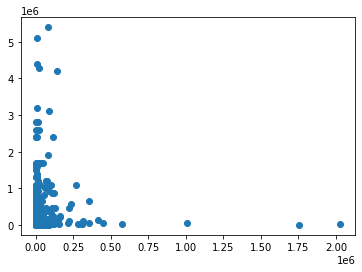

In [119]:
plt.scatter(df['likes'],df['followers'])

<BarContainer object of 2778 artists>

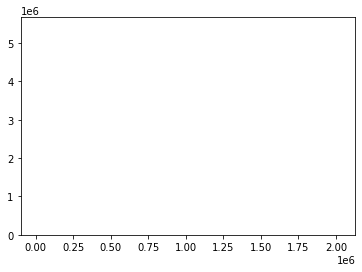

In [124]:
plt.bar(df['likes'],df['followers'])

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='celeb'>

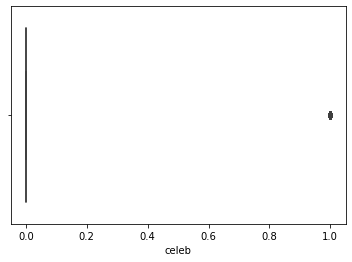

In [127]:
sns.boxplot(df['celeb'])

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='likes'>

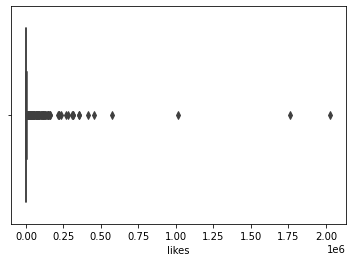

In [128]:
sns.boxplot(df['likes'])

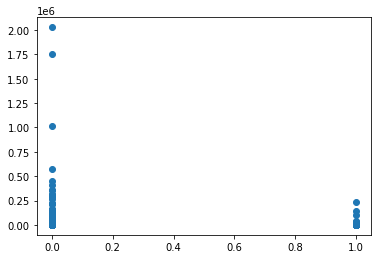

In [130]:
plt.scatter(df['celeb'],df['likes'])

In [139]:
ct1=pd.crosstab(df['likes'],df['celeb'])
ct1

celeb,0,1
likes,,
2.0,1,0
3.0,2,0
5.0,2,0
7.0,1,0
8.0,1,0
...,...,...
451068.0,1,0
573069.0,1,0
1011062.0,1,0


In [141]:
ct2=pd.crosstab(df['likes'],df['predict'], normalize='index')
ct2

predict,0.0,1.0
likes,,
2.0,1.0,0.0
3.0,1.0,0.0
5.0,1.0,0.0
7.0,1.0,0.0
8.0,1.0,0.0
...,...,...
451068.0,0.0,1.0
573069.0,0.0,1.0
1011062.0,0.0,1.0


c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='likes', ylabel='celeb'>

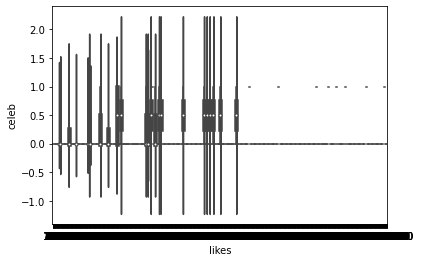

In [135]:
sns.violinplot(df['likes'],df["celeb"])

In [140]:
chi2_contingency(ct1)

(2086.4936852062447,
 1.574659038017543e-15,
 1599,
 array([[0.97444204, 0.02555796],
        [1.94888409, 0.05111591],
        [1.94888409, 0.05111591],
        ...,
        [0.97444204, 0.02555796],
        [0.97444204, 0.02555796],
        [0.97444204, 0.02555796]]))

In [142]:
chi2_contingency(ct2)

(1452.9688298337858,
 0.9960169215152108,
 1599,
 array([[0.76880349, 0.23119651],
        [0.76880349, 0.23119651],
        [0.76880349, 0.23119651],
        ...,
        [0.76880349, 0.23119651],
        [0.76880349, 0.23119651],
        [0.76880349, 0.23119651]]))

In [143]:
ct3=pd.crosstab(df['likes'],df['followers'], normalize='index')
ct3

followers,27.0,69.0,101.0,109.0,116.0,122.0,123.0,129.0,136.0,142.0,...,2400000.0,2600000.0,2800000.0,3100000.0,3200000.0,4200000.0,4300000.0,4400000.0,5100000.0,5400000.0
likes,,,,,,,,,,,,,,,,,,,,,
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451068.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
573069.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1011062.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
chi2_contingency(ct3)

(1627931.9042098334,
 1.0,
 2823834,
 array([[0.000625, 0.000125, 0.000125, ..., 0.000625, 0.000625, 0.000625],
        [0.000625, 0.000125, 0.000125, ..., 0.000625, 0.000625, 0.000625],
        [0.000625, 0.000125, 0.000125, ..., 0.000625, 0.000625, 0.000625],
        ...,
        [0.000625, 0.000125, 0.000125, ..., 0.000625, 0.000625, 0.000625],
        [0.000625, 0.000125, 0.000125, ..., 0.000625, 0.000625, 0.000625],
        [0.000625, 0.000125, 0.000125, ..., 0.000625, 0.000625, 0.000625]]))

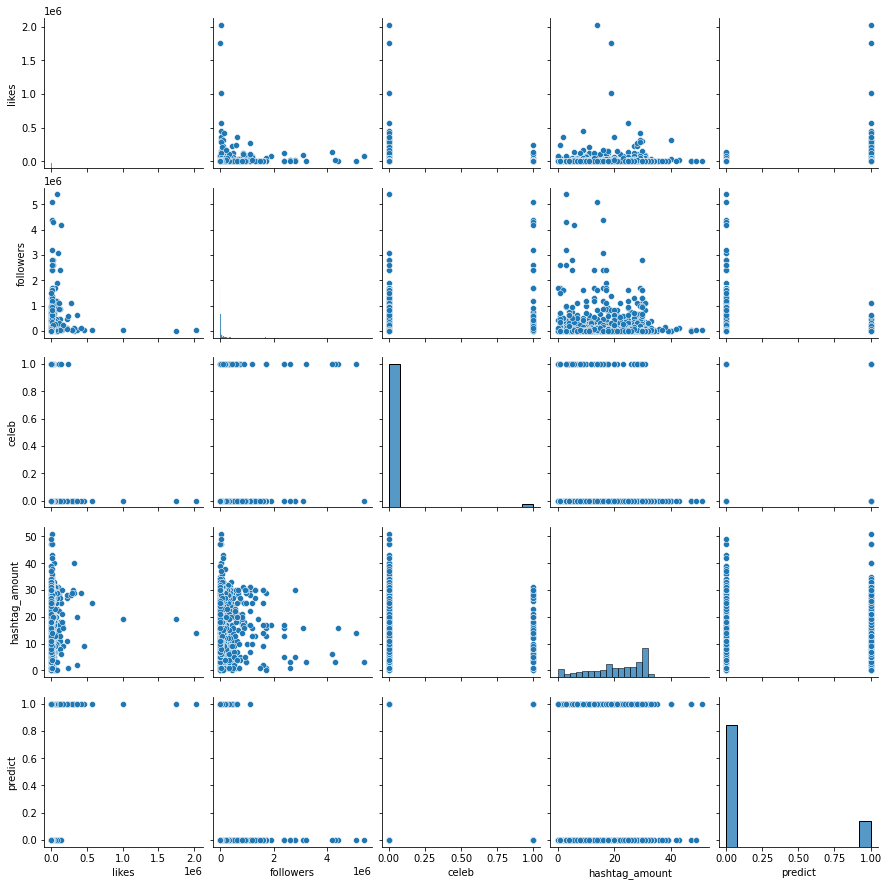

In [145]:
sns.pairplot(df[['likes','followers','celeb','hashtag_amount','predict']])